<a href="https://colab.research.google.com/github/Michaelzats/world-happiness-analysis-2021/blob/main/world_happiness_analysis_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Why are we happy in 2021?

People have always been trying to find the answer to that question. So they made a questionnaire to explore these in ["The World Happiness Report"](https://worldhappiness.report/). Six measurements are taken per country:
+ GDP per Capita
+ Family
+ Life Expectancy
+ Freedom
+ Generosity
+ Trust Government Corruption

The following study analyses the correlations and presents the results on why people are happy around the world in 2021 


Load the important required libraries.



## 1. READING THE DATASET.

In [54]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import iplot

sns.set_style('dark')

import warnings
warnings.filterwarnings('ignore')

Let us load the data set.



In [55]:
happy20=pd.read_csv('2021.csv')

Lets check first 5 and last 5 elements in dsta set

In [56]:
happy20.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [57]:
happy20.tail(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [58]:
happy20.shape

(149, 20)

Let's check the duplicate data in data set.

In [59]:
happy20.duplicated().sum()


0

In [60]:
happy20.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


## 2. DATA TREATMENT: CLEANING AND FORMATTING.

In [61]:
happy20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [62]:
happy20.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

No Null records found here.

####Renaming Columns


In [63]:
col_names_dict = {'Country name':'Country', 'Regional indicator':'Region',
                  'Standard error of ladder score':'Standard Error', 'Logged GDP per capita':'Logged GDPPC',
                  'Social support':'Social Support', 'Healthy life expectancy':'Life Expectancy',
                  'Freedom to make life choices':'Freedom', 'Perceptions of corruption': 'Corruption'}

happy20.rename(columns = col_names_dict, inplace = True)

In [64]:
happy20.isnull().sum()

Country                                       0
Region                                        0
Ladder score                                  0
Standard Error                                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDPPC                                  0
Social Support                                0
Life Expectancy                               0
Freedom                                       0
Generosity                                    0
Corruption                                    0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

Let us see which factors have maximum correlation with happiness in 2021



In [65]:
#Dropping columns which just numerically add up to the happiness index
happy20 = happy20.drop(['Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual','upperwhisker','lowerwhisker'],axis=1)

In [66]:
happy20.head()

,Country,Region,Ladder score,Standard Error,Logged GDPPC,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Ladder score in Dystopia
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,2.43
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.43
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.43
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.43
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.43


## 3. EXPLORATORY DATA ANALYSIS (EDA) AND VISUALISATION.



**Correlation Matrix**

Let's now look at the relationships between each of the six measured values (Logged GDP per capita, social support, etc.) and the overall ladder score to perhaps highlight which features may be more/less important.

In [67]:
feature_cols = ['Logged GDPPC', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']


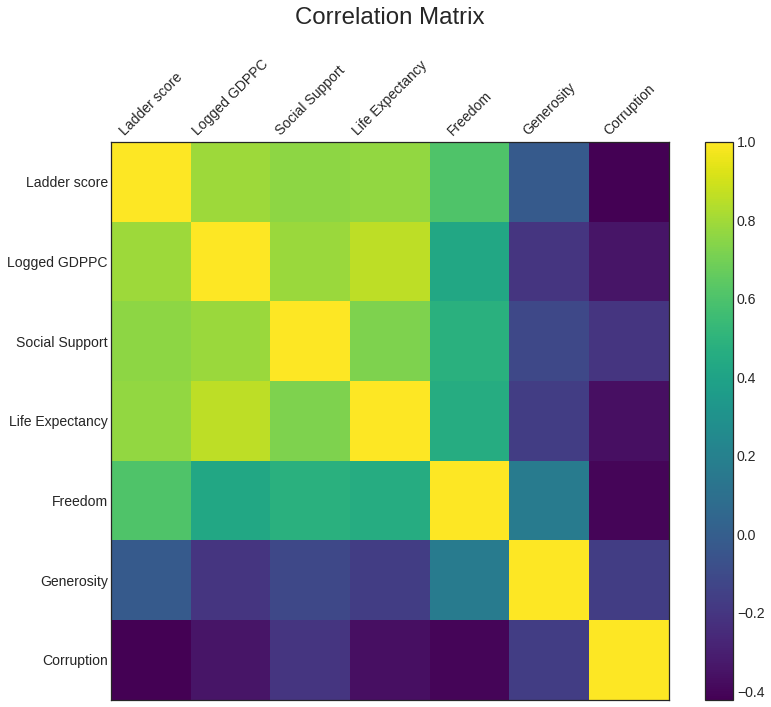

In [68]:
df = pd.concat([happy20['Ladder score'], happy20[feature_cols]], axis = 1)

fig = plt.figure(figsize = (13, 10))
plt.style.use('seaborn-white')

plt.matshow(df.corr(), fignum = fig.number, cmap = 'viridis')
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize = 24, y = 1.2);

It looks like the Logged GDPPC, Social Support, and Life Expectancy metrics all have a relatively high correlation with the overall score a country received. Also, these factors each seem to have a pretty high correlation with each other (e.g., Social Support is well correlated with Life Expectancy, and so on). On the other end of the spectrum, Generosity does not seem to have a sizeable correlation with any other measurement, including the Ladde

<function matplotlib.pyplot.show>

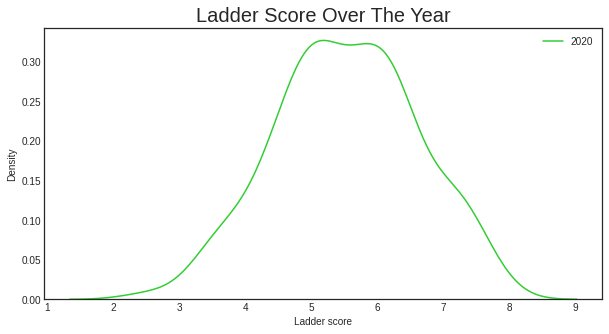

In [69]:
plt.figure(figsize=(10,5))
sns.kdeplot(happy20['Ladder score'],color='limegreen', label='2020')
plt.title('Ladder Score Over The Year',size=20)
plt.legend()
plt.show

<function matplotlib.pyplot.show>

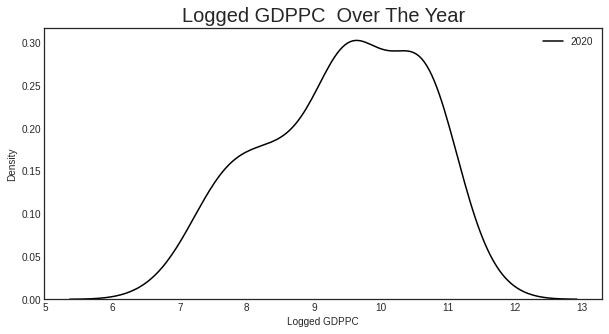

In [70]:
plt.figure(figsize=(10,5))
sns.kdeplot(happy20['Logged GDPPC'],color='black', label='2020')
plt.title('Logged GDPPC  Over The Year',size=20)
plt.legend()
plt.show

Ladder score with top 10 country by different criterias - 2021

In [123]:
happy20_top10 = happy20.groupby('Country')['Ladder score'].max().sort_values(ascending=False).head(20).reset_index()
happy20.columns_top10 = ['Country','Ladder Score']
happy20_top10


,Country,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
5,Norway,7.392
6,Sweden,7.363
7,Luxembourg,7.324
8,New Zealand,7.277
9,Austria,7.268


Finland, Denmark and Switzerland are found to be the happiest countries in the world 

In [104]:
happy20_GDP = happy20.groupby('Country')['Logged GDPPC'].max().sort_values(ascending=False).head(10).reset_index()
happy20.columns_GDP = ['Logged GDPPC','Ladder Score']
happy20_GDP

,Country,Logged GDPPC
0,Luxembourg,11.647
1,Singapore,11.488
2,Ireland,11.342
3,Switzerland,11.117
4,United Arab Emirates,11.085
5,Norway,11.053
6,United States,11.023
7,Hong Kong S.A.R. of China,11.000
8,Denmark,10.933
9,Netherlands,10.932


Luxembourg, Singapore and Ireland are found to be the richest countries by GDPPC in the world 

In [105]:
happy20_SC = happy20.groupby('Country')['Social Support'].max().sort_values(ascending=False).head(10).reset_index()
happy20_SC

,Country,Social Support
0,Iceland,0.983
1,Turkmenistan,0.983
2,Finland,0.954
3,Denmark,0.954
4,Norway,0.954
5,Kazakhstan,0.952
6,Slovenia,0.948
7,New Zealand,0.948
8,Czech Republic,0.947
9,Ireland,0.947


Iceland, Turkmenistan and Finland are found to be the richest countries by GDPPC in the world. Nonetheless, Turkmenistan is considered to be an authoritarian country, so the daya might be misleading


In [124]:
happy20_free = happy20.groupby('Country')['Freedom'].max().sort_values(ascending=False).head(10).reset_index()
happy20.columns_free = ['Freedom','Ladder Score']
happy20_free

,Country,Freedom
0,Uzbekistan,0.970
1,Norway,0.960
2,Cambodia,0.959
3,Iceland,0.955
4,Slovenia,0.949
5,Finland,0.949
6,Denmark,0.946
7,Sweden,0.945
8,Vietnam,0.940
9,Kyrgyzstan,0.935


Uzbekistan, Norway and Cambodia are found to be the most free countries in the world. 


In [107]:
happy20_life = happy20.groupby('Country')['Life Expectancy'].max().sort_values(ascending=False).head(10).reset_index()
happy20.columns_life = ['Life Expectancy','Ladder Score']
happy20_life

,Country,Life Expectancy
0,Singapore,76.953
1,Hong Kong S.A.R. of China,76.820
2,Japan,75.100
3,Spain,74.700
4,Switzerland,74.400
5,France,74.000
6,South Korea,73.900
7,Australia,73.900
8,Cyprus,73.898
9,North Cyprus,73.898


Singapore, Hong Kong S.A.R. of China and Japan are found to be the countries with the biggest life expectancy in the world. 


In [108]:
happy20_gen = happy20.groupby('Country')['Generosity'].max().sort_values(ascending=False).head(10).reset_index()
happy20.columns_gen = ['Generosity','Ladder Score']
happy20_gen

,Country,Generosity
0,Indonesia,0.542
1,Myanmar,0.509
2,Gambia,0.424
3,Haiti,0.422
4,Uzbekistan,0.311
5,Kenya,0.287
6,Thailand,0.287
7,Turkmenistan,0.273
8,Kosovo,0.257
9,United Kingdom,0.233


Indonesia, Myanmar and Gambia are found to be the most generous countries in the world. 


In [125]:
happy20_corr = happy20.groupby('Country')['Corruption'].max().sort_values(ascending=False).tail(10).reset_index()
happy20.columns_corr = ['Corruption','Ladder Score']
happy20_corr

,Country,Corruption
0,Ireland,0.363
1,Netherlands,0.338
2,Switzerland,0.292
3,Norway,0.270
4,New Zealand,0.242
5,Sweden,0.237
6,Finland,0.186
7,Denmark,0.179
8,Rwanda,0.167
9,Singapore,0.082


Ireland, Netherlands and Switzerland are found to be the least corrupted countries in the world. 


#### Happiness rate by the region.

In [126]:

regions =list(happy20["Region"].unique())
regions_happiness_rate = []

for i in regions:
    x = happy20[happy20["Region"] == i]
    happiness_rate = sum(x["Ladder score"]) / len(x)
    regions_happiness_rate.append(happiness_rate) # add list

fig = {
  "data": [
    {
      "values": regions_happiness_rate,
      "labels": regions, 
      "domain": {"x": [0, .8]},
      "name": "Ladder score Rate",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie" 
    },],
  "layout": {
        "title":"Ladder score  Rates by Region",
        "annotations": [ 
            { "font": { "size": 13}
    
            },
        ]
    }
}
iplot(fig)


From the above plot we can say that North Amrica has the  highest happiness rate,westren Europe has the  second highest happiness rate and sub- saharan Africa has the lowest happiness rate.

#### Life Expectancy Across Countries

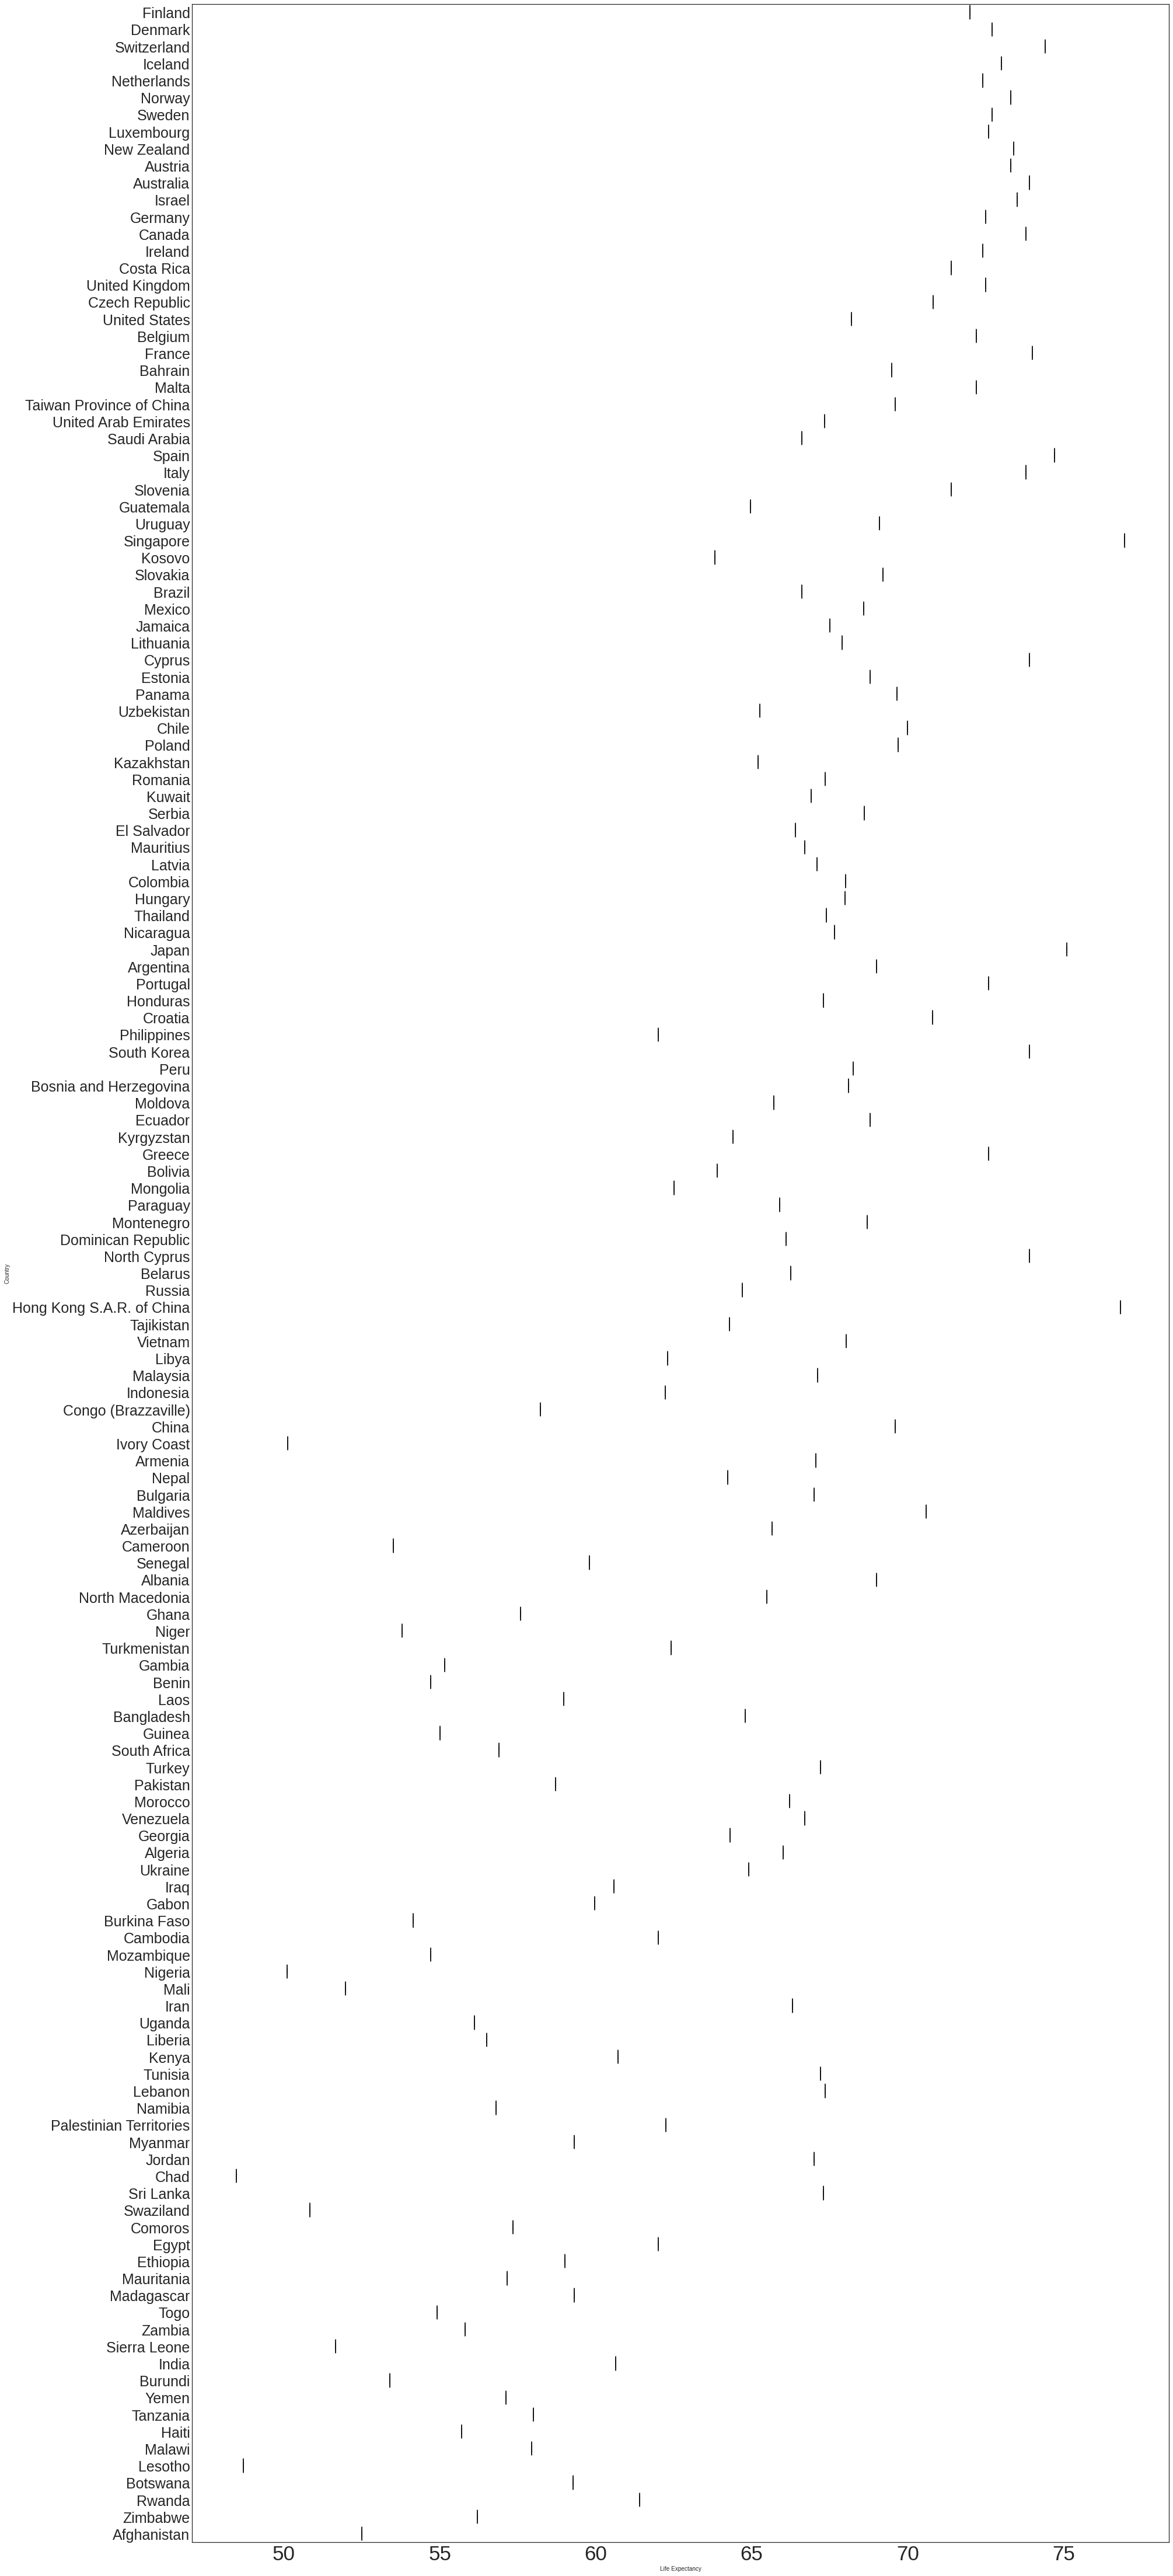

In [115]:
ax=sns.boxplot(x='Life Expectancy', y='Country', 
                 data=happy20, 
                 palette="BrBG",
                 dodge=False)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=35, ha="right")
plt.yticks(fontsize=25)
plt.xticks(fontsize=35)
fig = plt.gcf()
fig.set_size_inches(30,80)

As it can be seen above, the better country is, the more years people expect to live.

#### Ladder Score Across The World

In [116]:
map_happy = dict(type = 'choropleth', 
           locations = happy20['Country'],
           locationmode = 'country names',
           z = happy20['Ladder score'], 
           text = happy20['Country'],
           colorbar = {'title':'Ladder score'},
           colorscale = 'Viridis')
layout = dict(title = 'Ladder score Across The World', 
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [map_happy], layout=layout)
iplot(choromap3)

Happines Score Across The World. Most Central/Western and North America are seen to be happy at most. Meanwhile, the worst results are shown by African countries and most Asian countries. Interesting observation is that Latin American countries on average better than most of eastern europe countries.

In [117]:
map_happy = dict(type = 'choropleth', 
           locations = happy20['Country'],
           locationmode = 'country names',
           z = happy20['Logged GDPPC'], 
           text = happy20['Country'],
           colorbar = {'title':'Logged GDPPC'},
           colorscale = 'Viridis')
layout = dict(title = 'Logged GDPPC Across The World', 
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [map_happy], layout=layout)
iplot(choromap3)

Economy (GDPPC Per Capita) Across The World. Most Central/Western and North America are seen to experience high GDPPC per Capital. Meanwhile, the worst results are shown by African countries and most Asian countries.

#### Family - Social Support Across The World

In [118]:
map_happy = dict(type = 'choropleth', 
           locations = happy20['Country'],
           locationmode = 'country names',
           z = happy20['Social Support'], 
           text = happy20['Country'],
           colorbar = {'title':'Social Support'},
           colorscale = 'Viridis')
layout = dict(title = 'Social Support Across The World', 
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [map_happy], layout=layout)
iplot(choromap3)

Social Support Across The World. The entire Europe and America are seen to expereince high social support. Meanwhile, Asian countries saw average results while in africa its the worst.

#### Healthy Life Expectancy Across The World

In [119]:
map_happy = dict(type = 'choropleth', 
           locations = happy20['Country'],
           locationmode = 'country names',
           z = happy20['Life Expectancy'], 
           text = happy20['Country'],
           colorbar = {'title':'Life Expectancy'},
           colorscale = 'Viridis')
layout = dict(title = ' Life Expectancy Across The World', 
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [map_happy], layout=layout)
iplot(choromap3)

Life expectancy across The World. The middle/western Europe and America are seen to expereince high life expectancy. Meanwhile, Asian and eastern Eurpe countries saw average results while in africa the results of life expectancy are the worst.

#### Freedom To Choose Things Across The World

In [120]:
map_happy = dict(type = 'choropleth', 
           locations = happy20['Country'],
           locationmode = 'country names',
           z = happy20['Freedom'], 
           text = happy20['Country'],
           colorbar = {'title' :'Freedom'},
           colorscale = 'Viridis')
layout = dict(title = ' Freedom Across The World', 
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [map_happy], layout=layout)
iplot(choromap3)

Life expectancy across The World. Most European and Latin American countries saw good freedom of speech scores. Latin America is a bit better with regards to freedom of speech than in previous countries. Africa and Asia are not free so much, China here is probably an exception from the statistic, as the score is probably less trustworthy and does not show the reality. Africa is shown to have the least freedom. Good examples of free countries are Scandinavian countries. 

#### Corruption Across The World

In [121]:
map_happy = dict(type = 'choropleth', 
           locations = happy20['Country'],
           locationmode = 'country names',
           z = happy20['Corruption'], 
           text = happy20['Country'],
           colorbar = {'title' :'Corruption'},
           colorscale = 'Viridis')
layout = dict(title = 'Corruption Across The World', 
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [map_happy], layout=layout)
iplot(choromap3)

Corruption across The World. Corruption is shown all around the world with the exception of the countries from the European Union, Australia, and North America. Nevertheless, the USA saw also pretty much corruption. 

## 4. INTERFENCES AND CONCLUSIONS.


* . Most of the Asian and African countries has low happiness score

* . American countries has comparitively better happiness score

* . North America & western europe has highest happiness score






From the extensive analysis on happiness score for the country we can conclude that the happiness of citizens in the country depends on the efficiency of the government which includes GDPPC, corruption, freedom provided. Healthy life expectancy also significantly influences the happiness of citizens.

## 5. REFERENCES.


https://www.kaggle.com/datasets/unsdsn/world-happiness

https://worldhappiness.report/
